In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
# %matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as shc

import scipy.io as sio
from sklearn import manifold

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
def plotTSNE(X,y, name, value):
    red = y == 0
    green = y == 1

    plt.figure(figsize=(8,8))
    tsne = manifold.TSNE(n_components=2, init='random', perplexity=value, random_state=0)
    Y = tsne.fit_transform(X)
    principalDf = pd.DataFrame(data = Y, columns = ['pca1', 'pca2'])
    
    class_0 = np.where(y == 0)
    class_1 = np.where(y == 1)
    
    plt.scatter(Y[class_0, 0], Y[class_0, 1], marker='o', color='green')
    plt.scatter(Y[class_1, 0], Y[class_1, 1], marker='x', color='blue')
    
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylim(-80, 60)
    plt.xlim(-70, 70)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)
    plt.legend(['non-MDR', 'MDR'],prop={'size': 26})
    plt.grid()
    plt.tight_layout()
    plt.savefig(name + '.pdf')
    
    return principalDf

==================================>S1<=====================================
(842, 842)
(842, 1)


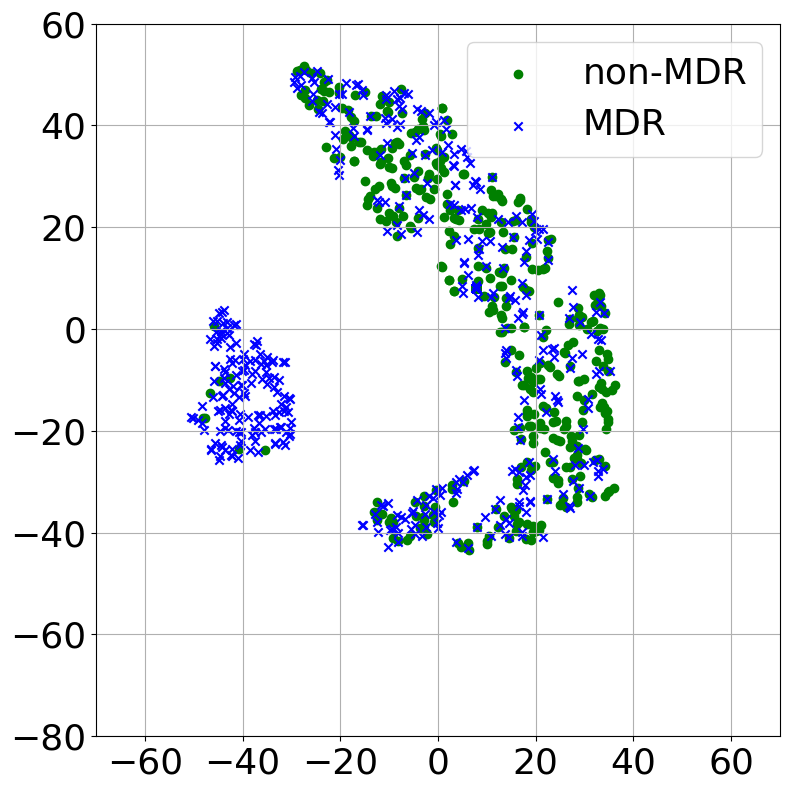

In [3]:
# %matplotlib notebook
folders = ["S1"]
method = "exponential"
modelado = "DTW"

i = 0
print("==================================>" + folders[i] + "<=====================================")
y_train = pd.read_csv('../df_to_load/DataToPaperAndTFM_Mod1/Subconjuntos_3D/' + folders[i] + '/y_train_tensor.csv')
X_train = pd.read_csv('../Step1_kernels/' + modelado + '/data_exponential/D/' + method + '/exponential_kernel_train_S1_VSigma_1.5.csv')

print(X_train.shape)
print(y_train.shape)

df_TSNE = plotTSNE(X_train, y_train, './Visual_2D/Figures/2_DTWD_exp', 20)
Admissiondboid_train = pd.read_csv("../df_to_load/DataToPaperAndTFM_Mod1/Subconjuntos_3D/" + folders[i] + "/Admissiondboid_train.csv")
Admissiondboid = []
for i in range(int(Admissiondboid_train.shape[0]/7)):
    Admissiondboid.append(Admissiondboid_train.loc[i*7][0])
    
Admissiondboid = pd.DataFrame(Admissiondboid, columns=["Admissiondboid"])
df_TSNE['Admissiondboid'] = Admissiondboid

### CVIs. sc over the original space

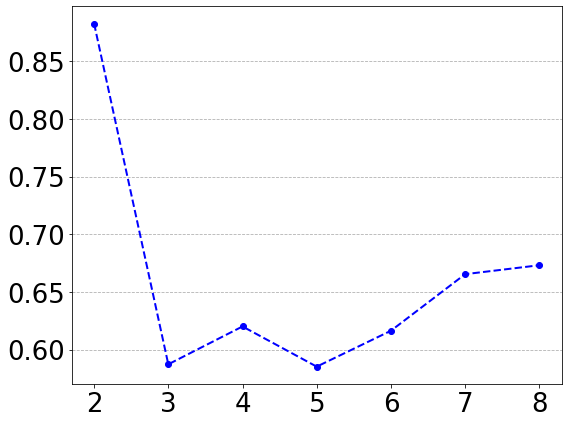

In [4]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import SpectralClustering

results = {}

scaler = StandardScaler() 
df_TSNE_norm = scaler.fit_transform(df_TSNE[["pca1", "pca2"]])
df_TSNE_norm = pd.DataFrame(df_TSNE_norm, columns=["D1", "D2"])
data = df_TSNE_norm

j=8
for i in range(2,9):
    # n_init: number of times the k-means algorithm will be executed with different centroid seeds. 
    # max_iter: max number of iterations of the k-means algorithm for a single run.
    labels_sc = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', n_neighbors=j, random_state=j).fit_predict(X_train)
    # Predicting the clusters
    db_index = davies_bouldin_score(data, labels_sc)
    results.update({i:db_index})

fig,axis = plt.subplots(1,1,figsize=(8,6))
fontsize=30
axis.plot(list(results.keys()),list(results.values()),'bo--',linewidth=2,alpha=1) 
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed') 
axis.set_axisbelow(True)  
plt.savefig("./1_DTW_kernel/DaviesBoulding.pdf")


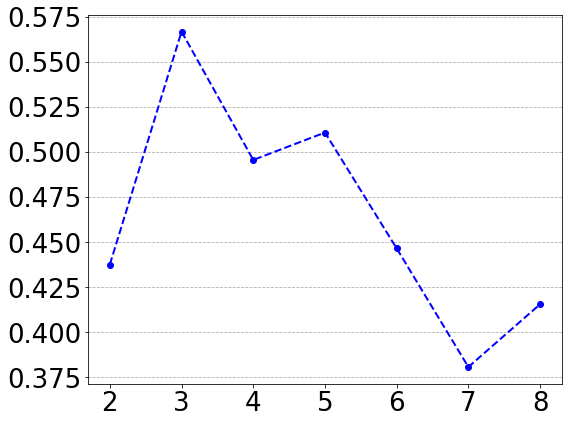

In [5]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import SpectralClustering

scaler = StandardScaler() 
df_TSNE_norm = scaler.fit_transform(df_TSNE[["pca1", "pca2"]])
df_TSNE_norm = pd.DataFrame(df_TSNE_norm, columns=["D1", "D2"])
data = df_TSNE_norm

j=8
for i in range(2,9):
    # n_init: number of times the k-means algorithm will be executed with different centroid seeds. 
    # max_iter: max number of iterations of the k-means algorithm for a single run.
    labels_sc = SpectralClustering(n_clusters=i, affinity='nearest_neighbors',n_neighbors=j,  random_state=j).fit_predict(X_train)
    # Predicting the clusters
    db_index = silhouette_score(data, labels_sc, random_state=j)
    results.update({i:db_index})

fig,axis = plt.subplots(1,1,figsize=(8,6))
fontsize=30
axis.plot(list(results.keys()),list(results.values()),'bo--',linewidth=2,alpha=1) 
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
axis.yaxis.grid(linestyle = 'dashed') 
axis.set_axisbelow(True) 
plt.tight_layout()
plt.savefig("./1_DTW_kernel/Silhouette.pdf")

## Apply sc

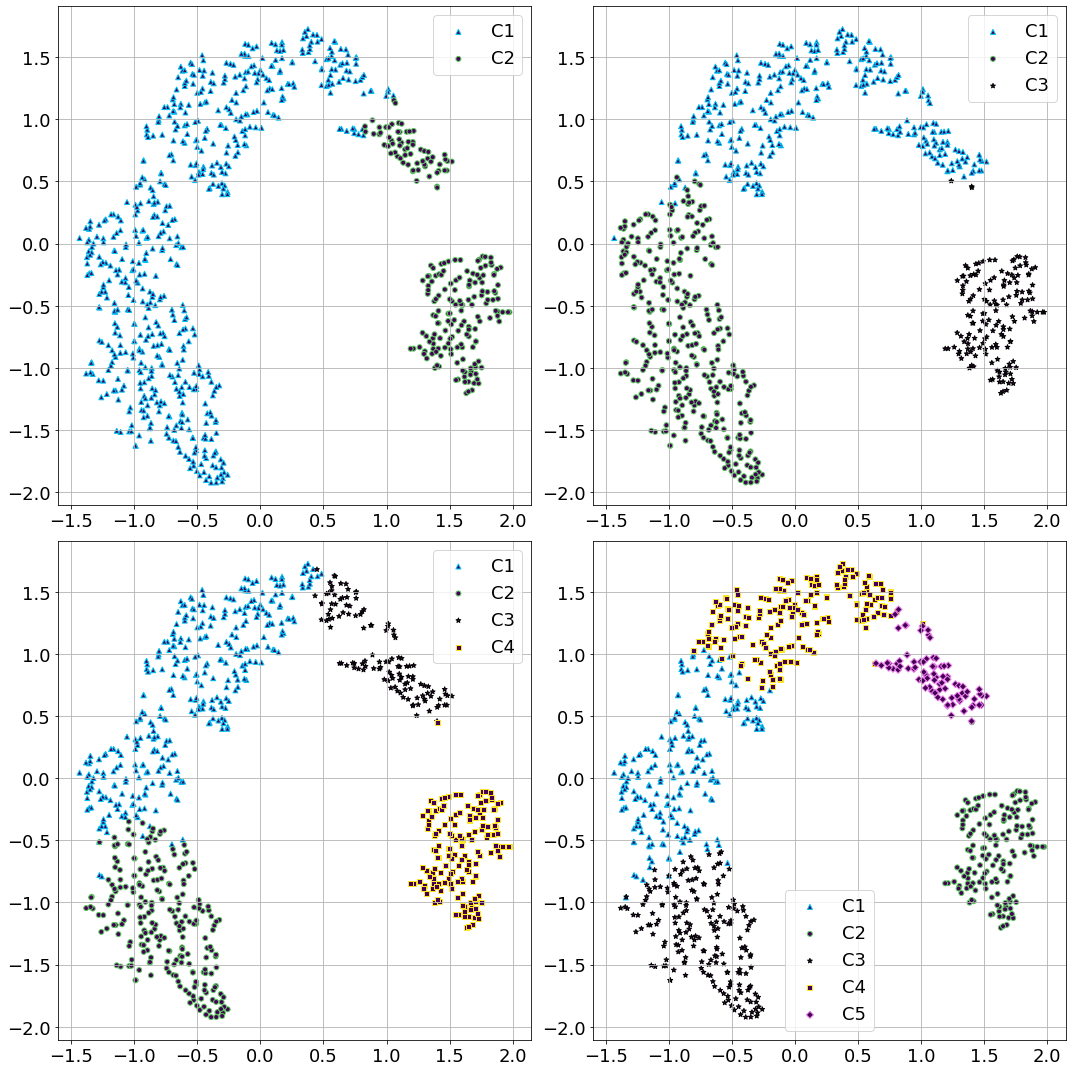

In [6]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
df_TSNE_norm = scaler.fit_transform(df_TSNE[["pca1", "pca2"]])
df_TSNE_norm = pd.DataFrame(df_TSNE_norm, columns=["D1", "D2"])
data = df_TSNE_norm

f = plt.figure(figsize=(15,15))
for i in range(2, 6):
    sc = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', n_neighbors=8).fit(X_train)
    f.add_subplot(2, 2, i-1)
    if i == 2:
        index1 = np.where(sc.labels_ == 0)
        plt.scatter(df_TSNE_norm['D1'].loc[index1[0]], df_TSNE_norm['D2'].loc[index1[0]],
                    s=25, c=sc.labels_[index1], edgecolors="#00c3f8", marker = '^', label="C1")
        
        index2 = np.where(sc.labels_ == 1)
        plt.scatter(df_TSNE_norm['D1'].loc[index2[0]], df_TSNE_norm['D2'].loc[index2[0]],
                    s=25, c=sc.labels_[index2], edgecolors="#5ec962", marker = 'o', label="C2")
    
    if i == 3:
        index1 = np.where(sc.labels_ == 0)
        plt.scatter(df_TSNE_norm['D1'].loc[index1[0]], df_TSNE_norm['D2'].loc[index1[0]],
                    s=25, c=sc.labels_[index1], marker = '^', edgecolors="#00c3f8", label="C1")
        
        index2 = np.where(sc.labels_ == 1)
        plt.scatter(df_TSNE_norm['D1'].loc[index2[0]], df_TSNE_norm['D2'].loc[index2[0]],
                    s=25, c=sc.labels_[index2], edgecolors="#5ec962", marker = 'o', label="C2")
        
        index3 = np.where(sc.labels_ == 2)
        plt.scatter(df_TSNE_norm['D1'].loc[index3[0]], df_TSNE_norm['D2'].loc[index3[0]],
                    s=25, c=sc.labels_[index3],edgecolors="black", marker = '*', label="C3")
        
    if i == 4:
        index1 = np.where(sc.labels_ == 0)
        plt.scatter(df_TSNE_norm['D1'].loc[index1[0]], df_TSNE_norm['D2'].loc[index1[0]],
                    s=25, c=sc.labels_[index1], marker = '^', edgecolors="#00c3f8", label="C1")
        
        index2 = np.where(sc.labels_ == 1)
        plt.scatter(df_TSNE_norm['D1'].loc[index2[0]], df_TSNE_norm['D2'].loc[index2[0]],
                    s=25, c=sc.labels_[index2], edgecolors="#5ec962", marker = 'o', label="C2")
        
        index3 = np.where(sc.labels_ == 2)
        plt.scatter(df_TSNE_norm['D1'].loc[index3[0]], df_TSNE_norm['D2'].loc[index3[0]],
                    s=25, c=sc.labels_[index3],edgecolors="black", marker = '*', label="C3")
        
        index4 = np.where(sc.labels_ == 3)
        plt.scatter(df_TSNE_norm['D1'].loc[index4[0]], df_TSNE_norm['D2'].loc[index4[0]],
                    s=25, c=sc.labels_[index4],edgecolors="#fde725", marker = 's', label="C4")
        
    if i == 5:
        index1 = np.where(sc.labels_ == 0)
        plt.scatter(df_TSNE_norm['D1'].loc[index1[0]], df_TSNE_norm['D2'].loc[index1[0]],
                    s=25, c=sc.labels_[index1], marker = '^', edgecolors="#00c3f8", label="C1")
        #fde725
        index2 = np.where(sc.labels_ == 1)
        plt.scatter(df_TSNE_norm['D1'].loc[index2[0]], df_TSNE_norm['D2'].loc[index2[0]],
                    s=25, c=sc.labels_[index2], edgecolors="#5ec962", marker = 'o', label="C2")
        
        index3 = np.where(sc.labels_ == 2)
        plt.scatter(df_TSNE_norm['D1'].loc[index3[0]], df_TSNE_norm['D2'].loc[index3[0]],
                    s=25, c=sc.labels_[index3],edgecolors="black", marker = '*', label="C3")
        
        index4 = np.where(sc.labels_ == 3)
        plt.scatter(df_TSNE_norm['D1'].loc[index4[0]], df_TSNE_norm['D2'].loc[index4[0]],
                    s=25, c=sc.labels_[index4],edgecolors="#fde725", marker = 's', label="C4")
        
        index5 = np.where(sc.labels_ == 4)
        plt.scatter(df_TSNE_norm['D1'].loc[index5[0]], df_TSNE_norm['D2'].loc[index5[0]],
                    s=25, c=sc.labels_[index5],edgecolors="violet", marker = 'D', label="C5")
        
        
    if i == 5:
        df_TSNE_norm['labels'] = sc.labels_
        
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(prop={'size': 18})
    plt.grid()
    
plt.tight_layout()
plt.savefig("./1_DTW_kernel/spectralclustering.pdf")


In [7]:
df_TSNE_norm["Admissiondboid"] = df_TSNE[["Admissiondboid"]]
df_TSNE_norm.labels.value_counts()
df_TSNE_norm

,D1,D2,labels,Admissiondboid
0,-0.767692,0.098227,0,4587163021305236556
1,-0.973435,0.266999,0,4678128168113384556
2,1.430716,-0.903071,1,4591376991402172556
3,1.147787,0.712527,4,4444811933250193556
4,1.974949,-0.552374,1,4590697252690172556
...,...,...,...,...
837,-1.011370,-0.884430,2,4483887072348232556
838,0.453222,1.625547,3,4357674703981004556
839,1.209133,0.795704,4,4613004308355172556
840,-0.163291,1.359845,3,4502903024299210556


In [8]:
df_TSNE_norm.to_csv("./1_DTW_kernel/clusters_bestROCAUC_5clusteres.csv", index=False)